<a href="https://colab.research.google.com/github/kushal634/project/blob/main/vehical_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving vehicle.csv to vehicle.csv


In [4]:
# Step 1: Load dataset
import pandas as pd
df = pd.read_csv("vehicle.csv")  # change to your actual file path

In [5]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [6]:
# Step 2: Basic Exploration
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [7]:
# Step 3: Data Cleaning & Preprocessing

# Drop rows with missing price
df = df.dropna(subset=['price'])

# Fill or drop other missing values
df = df.dropna(subset=['year', 'mileage'])  # These are essential features


# Convert 'year' and 'mileage' to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')
# Convert 'mileage' to string first to handle potential non-numeric entries, then extract numeric part
df['mileage'] = df['mileage'].astype(str).str.replace(',', '', regex=False).str.extract('(\d+)').astype(float)

In [8]:
# Step 4: Feature Engineering
df['vehicle_age'] = 2025 - df['year']  # Assuming current year is 2025

# Drop columns that are too specific or have high cardinality
df.drop(['name', 'description', 'engine', 'model'], axis=1, inplace=True)

In [9]:
# Step 5: Encode Categorical Variables
cat_cols = df.select_dtypes(include=['object']).columns

# Label encode for simplicity
le = LabelEncoder()
for col in cat_cols:
    df[col] = df[col].astype(str) # Convert to string type
    df[col] = le.fit_transform(df[col])

In [10]:
# Step 6: Define Features and Target
X = df.drop(['price'], axis=1)
y = df['price']

In [11]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Step 8: Model Training with Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Step 9: Evaluation
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 4478.387699676278
MSE: 60810479.19307053
RMSE: 7798.107410972904
R² Score: 0.8227192146498288


In [14]:
# Step 10: Cross Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validated R² Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))

Cross-Validated R² Scores: [0.53687043 0.81114866 0.77870452 0.70354746 0.67557359]
Average CV Score: 0.701168932287175


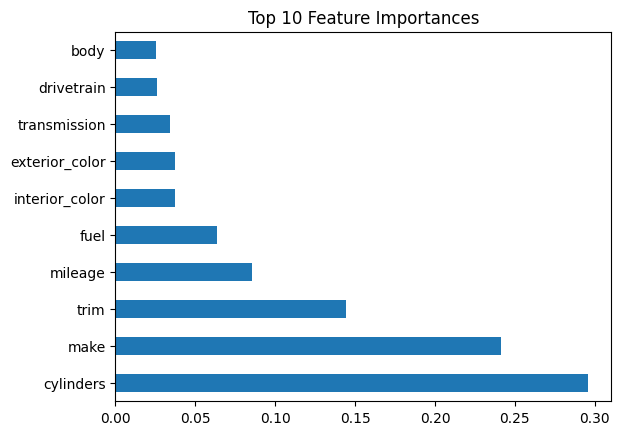

In [15]:
# Optional: Feature Importance Plot
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()